### Business Understanding
We are interested in answering the following questions:
1. When is the most affordable time to visit Seattle?
2. Which neighborhoods are the most highly rated, and what is the average price?
3. What kinds of rentals are available in those neighborhoods?

### Data Understanding
We used AirBnB listings data for Seattle from 2016 to answer our questions of interest. The data was split into three files, **calendar.csv**, **listings.csv**, and **reviews.csv**. The data was uploaded to Kaggle by AirBnB and can be found [here](https://www.kaggle.com/airbnb/seattle/data).

### Prepare Data

In [1]:
# import libraries and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cal_df = pd.read_csv('./data/calendar.csv')
list_df = pd.read_csv('./data/listings.csv')

In [2]:
cal_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
# drop columns with NaN values (NaNs occur here when the listing is unavailable, so we can safely remove them)
price_df = cal_df.dropna()
price_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [4]:
# convert date column from str to datetime
price_df["date"] = pd.to_datetime(price_df["date"], format="%Y-%m-%d")

<ipython-input-4-0c397a07c11a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df["date"] = pd.to_datetime(price_df["date"], format="%Y-%m-%d")


In [5]:
# function that takes a df and converts it from a text (object) representation of money to float
def text_to_float(df):
    """Converts a df from text (object) representation of money to float."""
    return df.replace('[\$,]', '', regex=True).astype(float)

# convert price column from str to float
price_df["price"] = text_to_float(price_df["price"])
price_df.dtypes

<ipython-input-5-9884e42b4785>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df["price"] = text_to_float(price_df["price"])


listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [6]:
# set date as index and groupby month
price_df.index = price_df["date"]
price_df["price"].groupby(by=pd.Grouper(freq='M')).mean().sort_values()

date
2016-01-31    121.568409
2016-02-29    124.293927
2016-03-31    128.644488
2016-04-30    135.097005
2016-11-30    135.688738
2017-01-31    136.882590
2016-10-31    137.031939
2016-12-31    137.251835
2016-05-31    139.538183
2016-09-30    143.255949
2016-06-30    147.473137
2016-08-31    150.656594
2016-07-31    152.094150
Name: price, dtype: float64

<AxesSubplot:xlabel='date'>

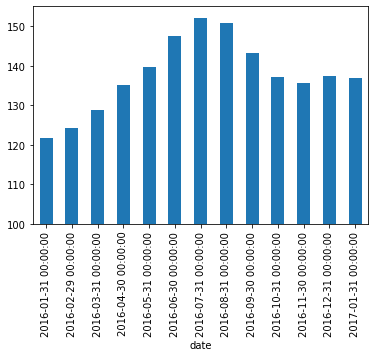

In [7]:
# create bar chart showing average price by month
price_df["price"].groupby(by=pd.Grouper(freq='M')).mean() \
    .plot(kind='bar', ylim=(100,155))

#### Insight 1
We can now answer our first question. The most affordable time to visit Seattle seems to be in the Winter months - from January through March; the least affordable time to visit Seattle seems to be in the Summer months - from June through August.

In [8]:
list_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [9]:
list_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [10]:
# select columns we need for our analysis (we drop Nans so we can average the price and location review scores)
hood_df = list_df.loc[:,("price", "property_type", "room_type","neighbourhood_group_cleansed", "review_scores_location")].dropna()
hood_df.head()

,price,property_type,room_type,neighbourhood_group_cleansed,review_scores_location
0,$85.00,Apartment,Entire home/apt,Queen Anne,9.0
1,$150.00,Apartment,Entire home/apt,Queen Anne,10.0
2,$975.00,House,Entire home/apt,Queen Anne,10.0
4,$450.00,House,Entire home/apt,Queen Anne,9.0
5,$120.00,House,Private room,Queen Anne,10.0


In [11]:
# convert price column from str to float
hood_df["price"] = text_to_float(hood_df["price"])
hood_df.dtypes

price                           float64
property_type                    object
room_type                        object
neighbourhood_group_cleansed     object
review_scores_location          float64
dtype: object

In [12]:
hood_df.loc[:,("neighbourhood_group_cleansed", "price", "review_scores_location")].groupby \
(by=["neighbourhood_group_cleansed"]).mean().sort_values(by=["review_scores_location"], ascending=False).head()

,price,review_scores_location
neighbourhood_group_cleansed,,
Capitol Hill,129.372549,9.823529
Downtown,154.280702,9.769737
Ballard,123.647668,9.766839
West Seattle,128.993827,9.765432
Queen Anne,161.591837,9.751020


#### Insight 2
We can now answer our second question. The most highly rated neighborhoods are Capitol Hill, Downtown, Ballard, West Seattle, and Queen Anne. The average price of a listing in those neighborhoods ranges between $124-162 per night, with Ballard being the most affordable, followed by West Seattle and Capitol Hill.

In [13]:
# select listings from the highest rated neighborhoods from the previous step
best_neighborhoods = ["Capitol Hill", "Downtown", "Ballard", "West Seattle", "Queen Anne"]
best_df = hood_df[hood_df["neighbourhood_group_cleansed"].isin(best_neighborhoods)]
best_df["neighbourhood_group_cleansed"].value_counts()

Capitol Hill    459
Downtown        456
Queen Anne      245
Ballard         193
West Seattle    162
Name: neighbourhood_group_cleansed, dtype: int64

In [14]:
best_df.property_type.groupby(by=best_df.neighbourhood_group_cleansed).value_counts(normalize=True)

neighbourhood_group_cleansed  property_type  
Ballard                       House              0.647668
                              Apartment          0.269430
                              Townhouse          0.031088
                              Bed & Breakfast    0.010363
                              Camper/RV          0.010363
                              Condominium        0.010363
                              Loft               0.010363
                              Bungalow           0.005181
                              Cabin              0.005181
Capitol Hill                  Apartment          0.644880
                              House              0.289760
                              Condominium        0.023965
                              Townhouse          0.015251
                              Bed & Breakfast    0.010893
                              Cabin              0.004357
                              Loft               0.004357
                          

#### Insight 3
We can now answer our third question.  
Ballard listings are 65% Houses, 27% Apartments, with the remainder being other property types.  
Capitol Hill listings are 65% Apartments, 29% Houses, with the remainder being other property types.  
Downtown listings are 88% Apartments, 7% Condos, with the remainder being other property types.  
Queene Anne listings are 58% Apartments, 34% Houses, with the remainder being other property types.  
West Seattle listings are 71% Houses, 20% Apartments, with the remainder being other property types.  

### Results
Here, we looked at AirBnB data for Seattle to figure out the best time and location to make a reservation.
1. We found that the most affordable time to visit is in the winter months.
2. We found that the top rated neighborhoods are Capitol Hill, Downtown, Ballard, West Seattle, and Queen Anne.
3. We found what types of listings are available in those neighborhoods to help us decide which one is right for us.